In [81]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)

In [82]:
import pandas as pd
import numpy as np
import re

In [83]:
import seaborn as sns
import platform
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

#f_path="/Library/Fonts/AppleGothic.ttf" -> 맥에서 사용
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [84]:
shop_2019 = pd.read_csv('../../data/commercial_store/소상공인시장진흥공단_상가업소정보_201906_01.csv', encoding='utf-8')

In [85]:
df_seoul = shop_2019.loc[shop_2019['시도명'].str.startswith('서울')].copy()

### 서울에 있는 스타벅스, 이디야 데이터 프레임 생성하기

In [86]:
df_seoul.loc[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|스타박스'),'상호명'].shape

(505,)

In [87]:
df_seoul.loc[df_seoul['상호명'].str.contains('이디야|EDIYA|ediya'),'상호명'].shape

(501,)

In [88]:
df_cafe = df_seoul[df_seoul['상호명'].str.contains('스타벅스|STARBUCKS|starbucks|이디야|ediya|EDIYA')]
df_cafe.shape                                                                                 

(1003, 39)

In [89]:
df_cafe.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1219,19976038,스타벅스,이태원점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1117013000101270029009542,NaN,서울특별시 용산구 이태원로 188,140200,4406.0,NaN,NaN,29,126.994781,37.534303
1676,25435527,이디야커피,신길역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156013200100590002019075,엔씨티오피스텔,서울특별시 영등포구 영등포로 353,150050,7318.0,NaN,1,NaN,126.918062,37.515118
1946,19998811,스타벅스종로3가점,종로3가점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111015600100090003016323,NaN,서울특별시 종로구 종로 113-1,110123,3139.0,NaN,1,NaN,126.990207,37.570585
2840,20680373,스타벅스,신사2점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1165010600100280001019301,푸른빌딩,서울특별시 서초구 강남대로 581,137904,6530.0,NaN,2,NaN,127.019763,37.513663
2886,20592419,이디야커피,이마트구로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1153010200101880026022963,이마트구로점,서울특별시 구로구 디지털로32길 43,152050,8379.0,NaN,3,NaN,126.897870,37.484385


In [90]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|스타박스'),'브랜드명']="스타벅스"

In [91]:
df_cafe[['상호명','브랜드명']].head(20)

,상호명,브랜드명
1219,스타벅스,스타벅스
1676,이디야커피,NaN
1946,스타벅스종로3가점,스타벅스
2840,스타벅스,스타벅스
2886,이디야커피,NaN
8718,이디야커피,NaN
14596,이디야커피,NaN
14939,스타벅스커피여의도IFC1F,스타벅스
14951,스타벅스,스타벅스
15161,이디야커피,NaN


### 브랜드명이 NaN인 값을 이디야로 채워라


In [92]:
df_cafe.loc[df_cafe['브랜드명'].isnull(),'상호명'].head()

1676     이디야커피
2886     이디야커피
8718     이디야커피
14596    이디야커피
15161    이디야커피
Name: 상호명, dtype: object

In [93]:
df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna(value='이디야')

In [94]:
df_cafe['브랜드명'].value_counts()

스타벅스    502
이디야     501
Name: 브랜드명, dtype: int64

In [95]:
# 상호명, 브랜드명 컬럼확인하기
df_cafe[['상호명','브랜드명']].head()

,상호명,브랜드명
1219,스타벅스,스타벅스
1676,이디야커피,이디야
1946,스타벅스종로3가점,스타벅스
2840,스타벅스,스타벅스
2886,이디야커피,이디야


In [96]:
geo_df = df_cafe

In [97]:
import folium
map = folium.Map(location=[geo_df['위도'].mean(),
                          geo_df['경도'].mean()],
                zoom_start = 12,
                tiles = 'Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n,'상호명'] + '-' + geo_df.loc[n,'도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '스타벅스':
        icon_color = 'green'
    else:
        icon_color = 'blue'
    
    # folium.features.CircleMarker 오류가 날 경우---->
    folium.CircleMarker(
        location = [geo_df['위도'][n],
                   geo_df['경도'][n]],
        radius=3,
        popup=popup_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map

### 구별 브랜드별 점포수로 데이터프레임 생성하기

In [98]:
df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     44
강동구   스타벅스    13
      이디야     12
강북구   스타벅스     5
      이디야     11
강서구   스타벅스    17
      이디야     41
관악구   스타벅스     9
      이디야     23
광진구   스타벅스    14
      이디야     16
구로구   스타벅스    12
      이디야     21
금천구   스타벅스    13
      이디야     11
노원구   스타벅스     9
      이디야     34
도봉구   스타벅스     1
      이디야      9
동대문구  스타벅스     8
      이디야     19
동작구   스타벅스     8
      이디야     11
마포구   스타벅스    30
      이디야     22
서대문구  스타벅스    19
      이디야     13
서초구   스타벅스    48
      이디야     19
성동구   스타벅스     6
      이디야     17
성북구   스타벅스    13
      이디야     22
송파구   스타벅스    28
      이디야     27
양천구   스타벅스    11
      이디야     17
영등포구  스타벅스    30
      이디야     28
용산구   스타벅스    20
      이디야     11
은평구   스타벅스    10
      이디야     21
종로구   스타벅스    33
      이디야     17
중구    스타벅스    55
      이디야     24
중랑구   스타벅스     6
      이디야     11
Name: 상호명, dtype: int64

In [99]:
df_cafe_brand = pd.DataFrame(
    df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()
).reset_index()

In [100]:
df_cafe_brand

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,44
2,강동구,스타벅스,13
3,강동구,이디야,12
4,강북구,스타벅스,5
5,강북구,이디야,11
6,강서구,스타벅스,17
7,강서구,이디야,41
8,관악구,스타벅스,9
9,관악구,이디야,23


In [101]:
df_cafe_brand.columns = ['구', '브랜드명', '매장수']
df_cafe_brand

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,44
2,강동구,스타벅스,13
3,강동구,이디야,12
4,강북구,스타벅스,5
5,강북구,이디야,11
6,강서구,스타벅스,17
7,강서구,이디야,41
8,관악구,스타벅스,9
9,관악구,이디야,23


### 시각화

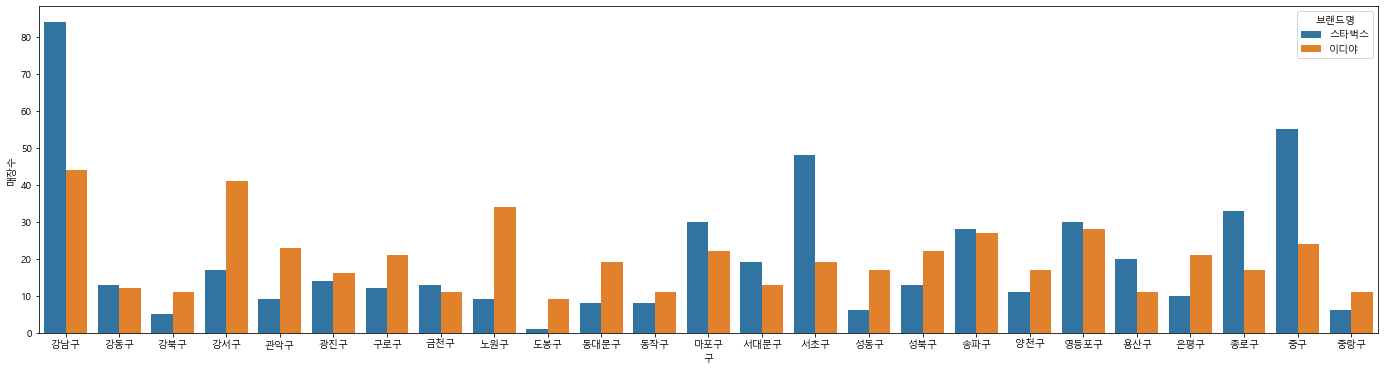

In [102]:
plt.figure(figsize=(24,6))
sns.barplot(data=df_cafe_brand, x='구', y='매장수', hue='브랜드명')

### groupby로 구별로 개수 확인하기

In [103]:
df_cafe.groupby(['시군구명'])['상호명'].count()

시군구명
강남구     128
강동구      25
강북구      16
강서구      58
관악구      32
광진구      30
구로구      33
금천구      24
노원구      43
도봉구      10
동대문구     27
동작구      19
마포구      52
서대문구     32
서초구      67
성동구      23
성북구      35
송파구      55
양천구      28
영등포구     58
용산구      31
은평구      31
종로구      50
중구       79
중랑구      17
Name: 상호명, dtype: int64

In [104]:
df_cafe_gu = pd.DataFrame(df_cafe.groupby(['시군구명'])['상호명'].count())
df_cafe_gu.columns=['매장수']
df_cafe_gu.head()                          

,매장수
시군구명,
강남구,128
강동구,25
강북구,16
강서구,58
관악구,32


### choropleth 그리기
* 구별로 매장수를 표현

In [105]:
import json
geo_path = '../../data/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))
geo_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.05181987399999, 37.685815952999974],
      [127.05195432999994, 37.68295554600002],
      [127.05124372099999, 37.68200315500002],
      [127.050936224, 37.68010014399999],
      [127.04973706099997, 37.676724165999985],
      [127.04887969799995, 37.67518859900002],
      [127.04820611399998, 37.67048413200001],
      [127.04893704599999, 37.667590002],
      [127.05142672199997, 37.663973570999985],
      [127.051469816, 37.66042898699999],
      [127.05343323299996, 37.65751023399997],
      [127.054073077, 37.654496732999974],
      [127.05376492699997, 37.652060053000014],
      [127.05396756200003, 37.650582568],
      [127.05545541100003, 37.64824690299997],
      [127.05584227600002, 37.64705617300001],
      [127.05566746900001, 37.64460474399999],
      [127.05516606799995, 37.643454948],
      [127.05513914699998, 37.64133787499998],
      [127.0547437

In [106]:
map = folium.Map(location=[geo_df['위도'].mean(),
                          geo_df['경도'].mean()],
                zoom_start=12)


map.choropleth(geo_data=geo_json,
        data = df_cafe_gu['매장수'],
        columns = [df_cafe_gu.index, df_cafe_gu['매장수']],
        fill_color = 'Purples',
        key_on = 'properties.SIG_KOR_NM',
        fill_opacity=0.7,
        line_opacity=0.2,
        highlight=True)
 
for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n,'상호명'] + '-' + geo_df.loc[n,'도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'] == '스타벅스':
        icon_color = 'green'
    else:
        icon_color = 'blue'
    
    # folium.features.CircleMarker 오류가 날 경우---->
    folium.CircleMarker(
        location = [geo_df[n, '위도'],
                   geo_df[n, '경도']],
        radius=3,
        popup=popup_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### 스타벅스 매장 분포

In [107]:
df_cafe_temp = df_cafe[df_cafe['브랜드명']=='스타벅스']
df_cafe_starbucks = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_starbucks.columns=['매장수']
df_cafe_starbucks.head()      

,매장수
시군구명,
강남구,84
강동구,13
강북구,5
강서구,17
관악구,9


In [108]:
`
map = folium.Map(location=[geo_df['위도'].mean(),
                           geo_df['경도'].mean()],
                zoom_start=11)

map.choropleth(geo_data=geo_json,
                data = df_cafe_starbucks['매장수'],
                columns = [df_cafe_starbucks.index, df_cafe_starbucks['매장수']],
                fill_color = 'YlGn',
                key_on = 'properties.SIG_KOR_NM',
                fill_opacity=0.7,
                line_opacity=0.2,
                highlight=True)
 
for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n,'상호명'] + '-' + geo_df.loc[n,'도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스':
        icon_color = 'green'

    
        # folium.features.CircleMarker 오류가 날 경우---->
        folium.CircleMarker(
            location = [geo_df[n, '위도'], geo_df[n, '경도']],
            radius=3,
            popup=popup_name,
            color=icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)

map

SyntaxError: invalid syntax (<ipython-input-108-234117a31e00>, line 1)

### 스타벅스와 이디야 비교

In [109]:
df_cafe_brand_vs = df_cafe_brand.pivot_table(index = '구',
                                            columns = '브랜드명',
                                            values = '매장수')
df_cafe_brand_vs.columns = ['스타벅스', '이디야']
df_cafe_brand_vs.head()

,스타벅스,이디야
구,,
강남구,84,44
강동구,13,12
강북구,5,11
강서구,17,41
관악구,9,23


In [110]:
# axis=1이면 가로 axis=1이면 세로
df_cafe_brand_vs['매장수비교'] = df_cafe_brand_vs.apply(lambda x : 1 if x['스타벅스'] > x['이디야'] else 0, axis=1)
df_cafe_brand_vs.head()

,스타벅스,이디야,매장수비교
구,,,
강남구,84,44,1
강동구,13,12,1
강북구,5,11,0
강서구,17,41,0
관악구,9,23,0


In [111]:
lng_list = []
lat_list = []
for gu in df_cafe_brand_vs.index:
    lat = df_cafe.loc[df_cafe['시군구명'] == gu, '위도'].mean()
    lng = df_cafe.loc[df_cafe['시군구명'] == gu, '경도'].mean()
    lat_list.append(lat)
    lng_list.append(lng)
    
df_cafe_brand_vs['위도'] = lat_list
df_cafe_brand_vs['경도'] = lng_list
df_cafe_brand_vs.head()

,스타벅스,이디야,매장수비교,위도,경도
구,,,,,
강남구,84,44,1,37.506152,127.045159
강동구,13,12,1,37.540512,127.135966
강북구,5,11,0,37.632224,127.022390
강서구,17,41,0,37.556381,126.837973
관악구,9,23,0,37.481693,126.935638


In [112]:
df_cafe_brand_vs['스타벅스'] = df_cafe_brand_vs['스타벅스'].astype(float)
df_cafe_brand_vs['이디야'] = df_cafe_brand_vs['이디야'].astype(float)
df_cafe_brand_vs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 5 columns):
스타벅스     25 non-null float64
이디야      25 non-null float64
매장수비교    25 non-null int64
위도       25 non-null float64
경도       25 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.2+ KB


In [113]:
map = folium.Map(location=[geo_df['위도'].mean(),
                          geo_df['경도'].mean()],
                zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
              data = df_cafe_brand_vs['매장수비교'],
              columns = [df_cafe_brand_vs.index,
                        df_cafe_brand_vs['매장수비교']],
              fill_color = 'BuGn',
              key_on = 'properties.SIG_KOR_NM',
              fill_opacity = 0.7,
              line_opacity = 0.2,
              highlight = True)

for gu in df_cafe_brand_vs.index:
    for cafe in ['스타벅스', '이디야']:
        
        cafe_count = df_cafe_brand_vs.loc[gu, cafe]
        msg = f'{gu} {cafe} 매장수 : {cafe_count:.0f}
        
        icon_color = 'blue'
        if cafe == '스타벅스':
            icon_color = 'green'
            
        folium.CircleMarker(
        location = [df_cafe_brand_vs.loc[gu, '위도'],
                   df_cafe_brand_vs.loc[gu, '경도']],
        radius = cafe_count,
        color = icon_color,
        popup = msg,
        fill = True,
        fill_color = icon_color).add_to(map)
        
map

SyntaxError: EOL while scanning string literal (<ipython-input-113-8fb61b9924d1>, line 19)